In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import strawb
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import scipy.ndimage
import random
import scipy.spatial
import cv2
import scipy.interpolate

import matplotlib.colors
import copy
import matplotlib.ticker
import matplotlib.patches

(array([[   0,    0],
        [   0,    1],
        [   0,    2],
        ...,
        [1279,  957],
        [1279,  958],
        [1279,  959]]),
 (550996, 2))

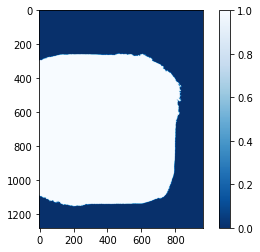

In [6]:
with np.load('LED_images.npz') as f:
    images = f['images']

image = images[4]
blue = image[:,:,2]
green = image[:,:,1]
red = image[:,:,0]

mounting_blue = blue < 0.15
mounting_green = green < 0.15
mounting_red = red < 0.15

mounting = mounting_blue & mounting_green & mounting_red  

mounting_labeled, n = scipy.ndimage.measurements.label(mounting)#, structure=s)  

mask = mounting_labeled == mounting_labeled[-1]
mask = ~mask # invert the mask

mask_labeled, n_mask = scipy.ndimage.measurements.label(mask)#, structure=s)  

mask_area = scipy.ndimage.measurements.sum(mask, mask_labeled, index=np.arange(mask_labeled.max() + 1)) 

mask_size = mask_area[mask_labeled]  # set value of each pixel to the size of the cluster it belongs to 
m = np.where(mask_size == mask_area.max(), True, False)

plt.imshow(m, cmap='Blues_r')
plt.colorbar()

mounting_coo = np.argwhere(m == False)
mounting_coo, mounting_coo.shape